# Wholesale customers data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [ ]:
df=pd.read_csv("/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.shape

(440, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

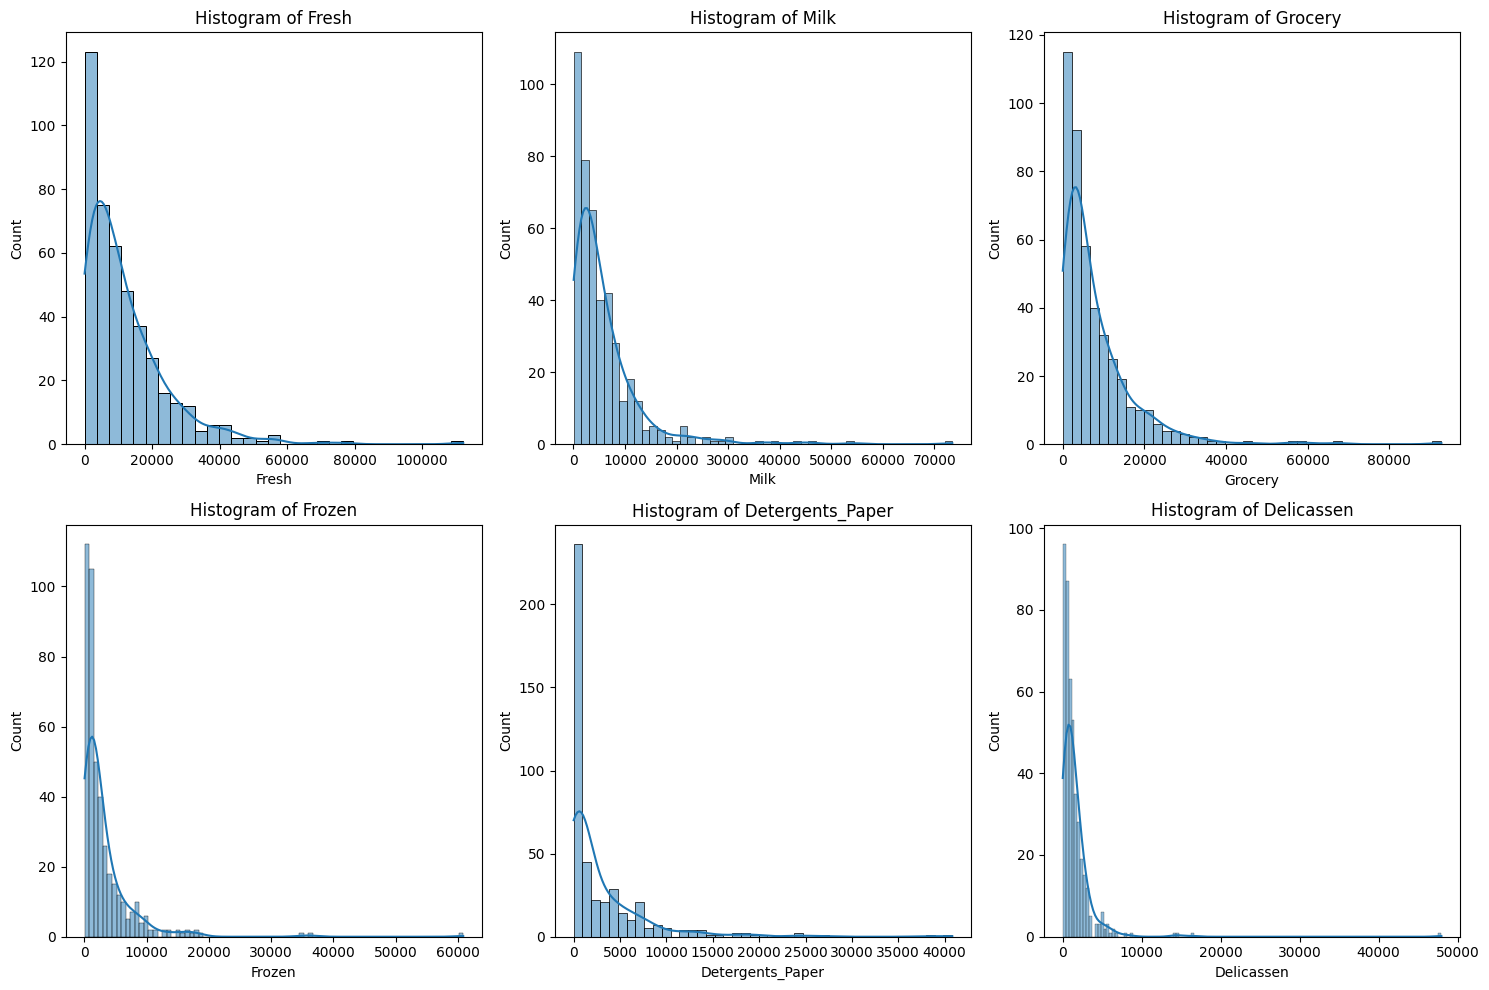

In [ ]:
#Histograms for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

columns_to_plot = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

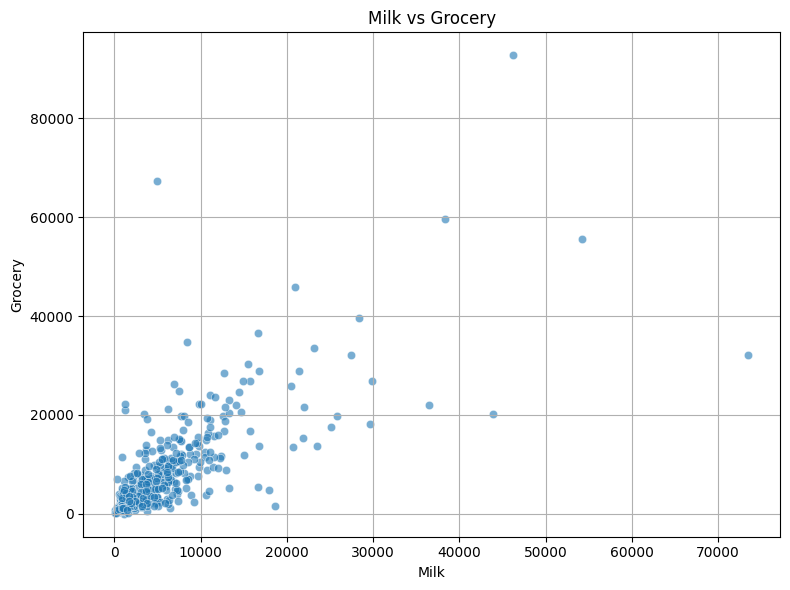

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', alpha=0.6)
plt.title('Milk vs Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.grid(True)
plt.tight_layout()
plt.show()

.
The scatter plot shows a positive relationship between Milk and Grocery spending.

.As Milk expenditure increases, Grocery expenditure tends to increase as well.

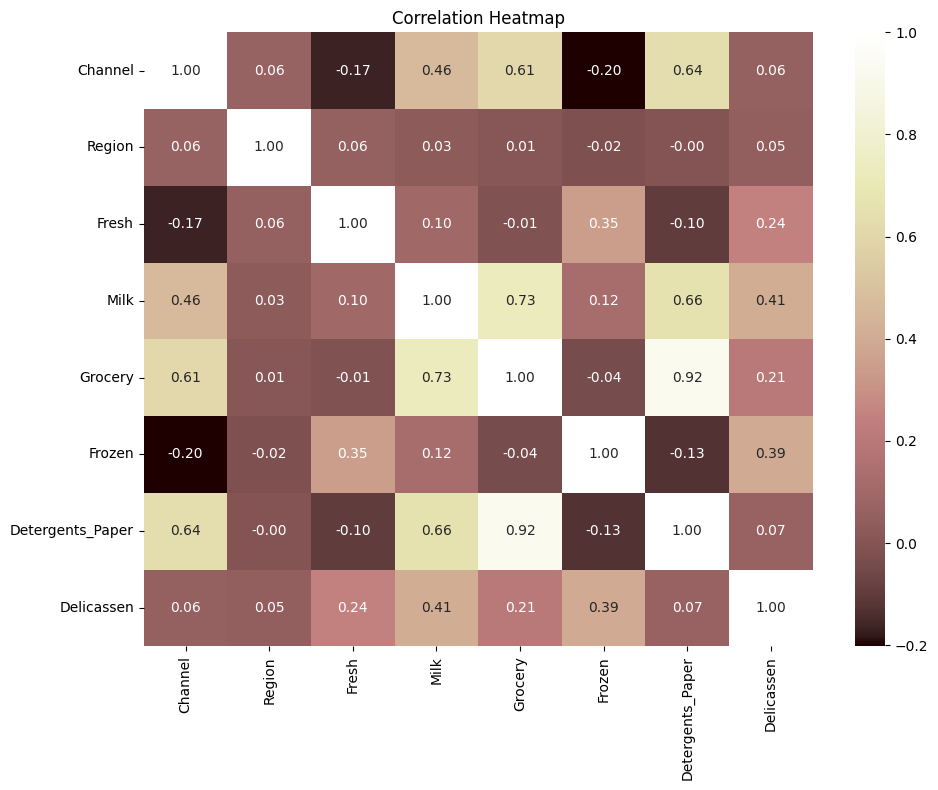

In [ ]:
#plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='pink',fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

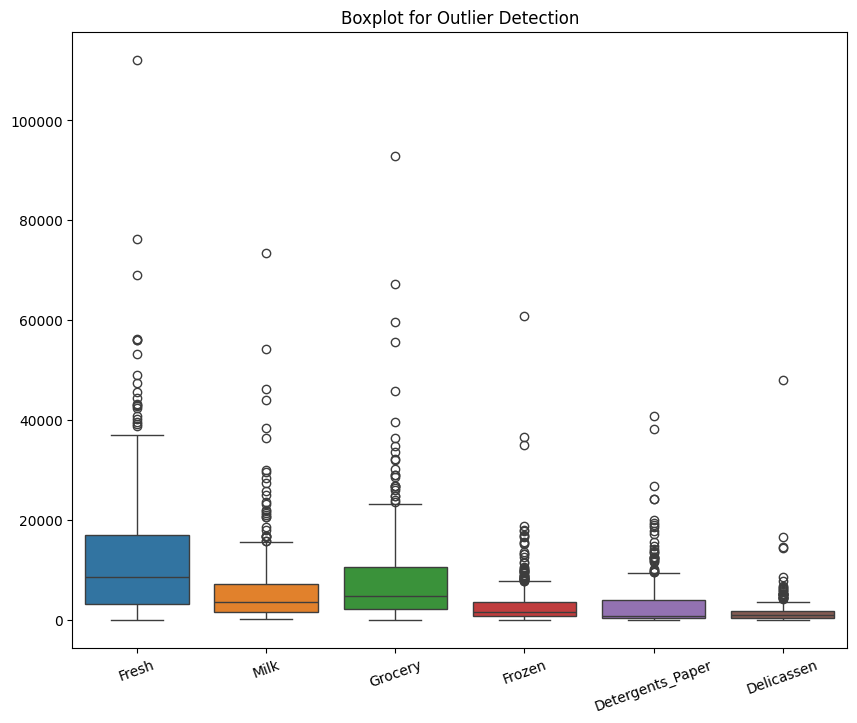

In [ ]:
#detect and handle outliers using boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=20)
plt.title("Boxplot for Outlier Detection")
plt.savefig('Boxplot for Outlier Detection.png')
plt.show()

In [ ]:
#detecting outliers by creating data as the new dataset
data=df
columns_to_detect_outliers = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for col in columns_to_detect_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



In [ ]:
data.shape

(318, 8)

In [ ]:
#removing outliers using z-score
new_data=df
from scipy import stats
z_scores = np.abs(stats.zscore(new_data))
threshold = 3
new_data = new_data[(z_scores < threshold).all(axis=1)]
print("data before removing outliers:",df.shape)
print("data after removing outliers:",new_data.shape)


data before removing outliers: (440, 8)
data after removing outliers: (414, 8)


Text(0.5, 1.0, 'Boxplot for Outlier Detection')

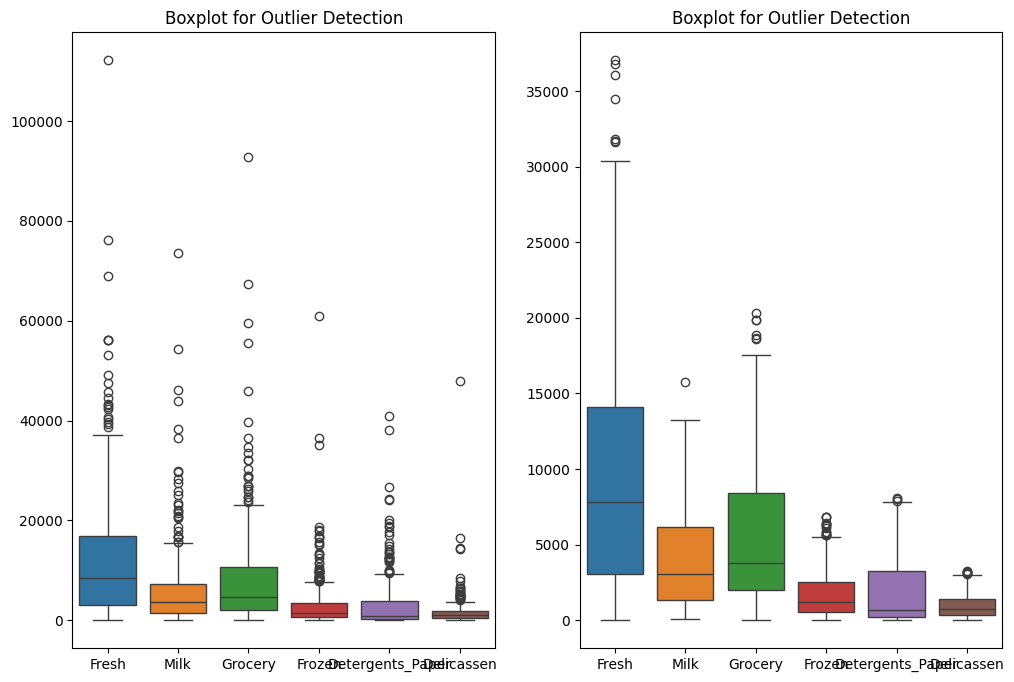

In [ ]:
#subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes = axes.flatten()
sns.boxplot(data=df[columns_to_plot], ax=axes[0])
axes[0].set_title("Boxplot for Outlier Detection")

sns.boxplot(data=data[columns_to_plot], ax=axes[1])
axes[1].set_title("Boxplot for Outlier Detection")


In [ ]:
#analyzing spending patterns by channel and region:

# Expand display so rows don't wrap
pd.set_option('display.width', 1000)


# Grouped summary by Channel
channel_mean = data.groupby('Channel')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
print("Average Spending by Channel:\n", channel_mean)

# Grouped summary by Region
region_mean = data.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
print("\nAverage Spending by Region:\n", region_mean)


Average Spending by Channel:
                 Fresh         Milk       Grocery       Frozen  Detergents_Paper   Delicassen
Channel                                                                                     
1        10134.806034  2767.646552   3571.599138  1976.715517        804.612069   887.383621
2         8594.209302  7284.465116  10937.674419  1322.000000       4635.372093  1245.348837

Average Spending by Region:
                Fresh         Milk      Grocery       Frozen  Detergents_Paper   Delicassen
Region                                                                                    
1        9483.036364  3506.381818  4579.436364  2075.072727       1452.509091   847.345455
2       11021.700000  3107.533333  5304.366667  1775.966667       1467.766667   893.933333
3        9605.832618  4216.656652  5829.403433  1737.690987       1980.218884  1028.115880


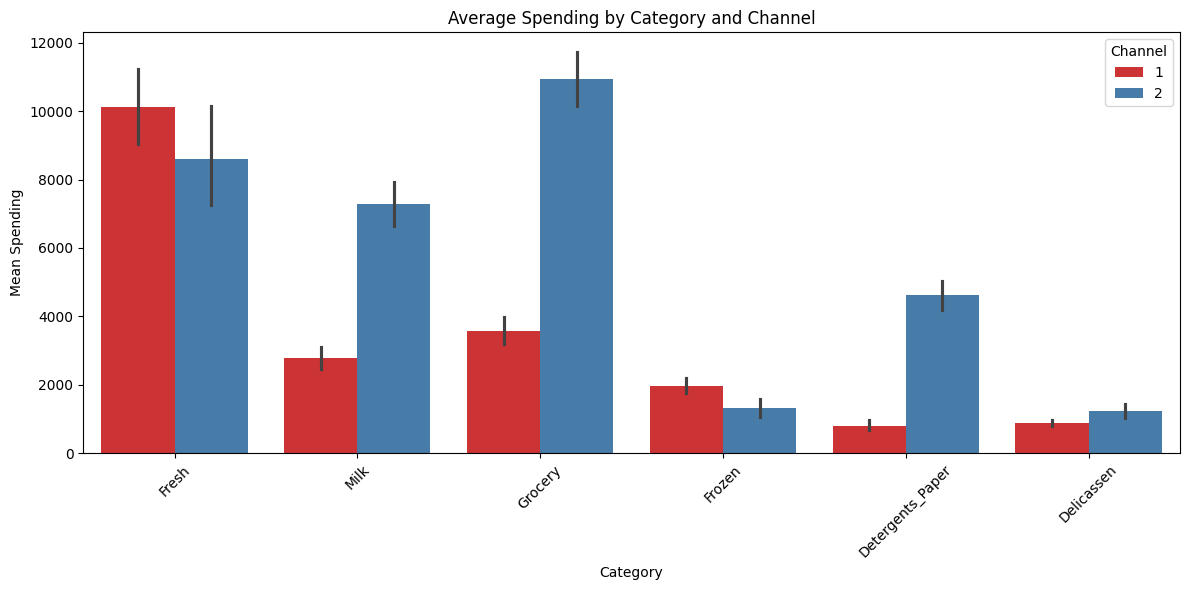

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for grouped barplot
df_melted = data.melt(id_vars='Channel', value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
                    var_name='Category', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Category', y='Spending', hue='Channel',palette='Set1')
plt.title('Average Spending by Category and Channel')
plt.ylabel('Mean Spending')
plt.legend(title='Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-67-853626523.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.barplot(data=df_melted, x='Category', y='Spending', hue='Region',color='pink')


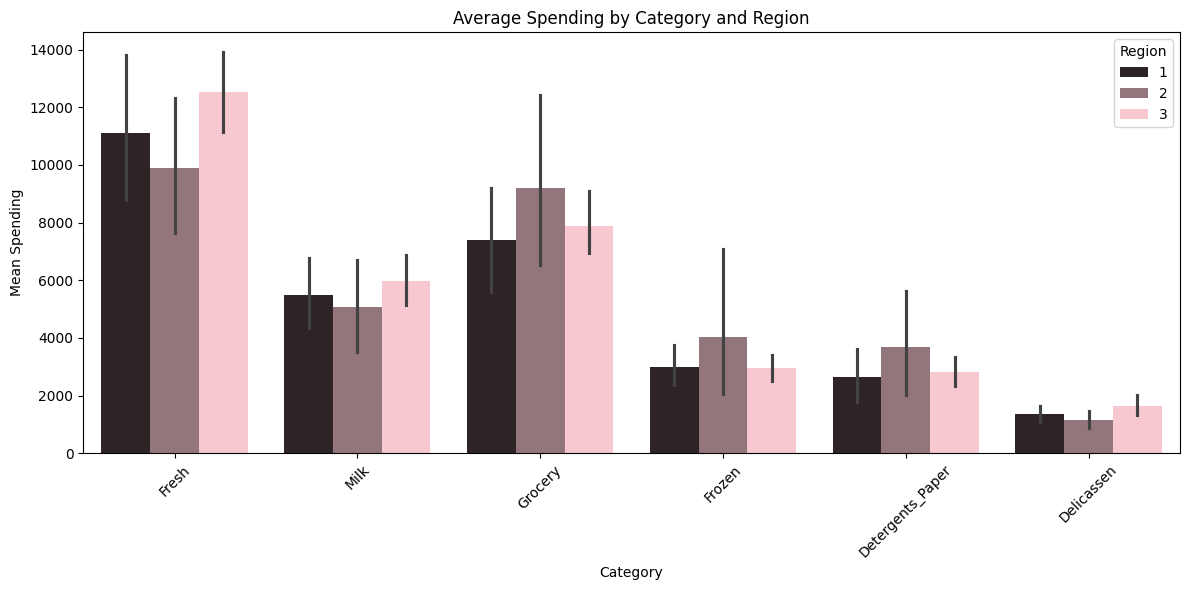

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for grouped barplot
df_melted = df.melt(id_vars='Region', value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
                    var_name='Category', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Category', y='Spending', hue='Region',color='pink')
plt.title('Average Spending by Category and Region')
plt.ylabel('Mean Spending')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Normalize data

In [ ]:
#drop chanel and region
X=data.drop(['Channel','Region'],axis=1)

#scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.36041979,  1.74071034,  0.43271395, -0.98480101,  0.37827742,
         0.45117793],
       [-0.32503941,  1.78801539,  0.86752557, -0.0233858 ,  0.65924069,
         1.00971769],
       [ 0.43321624, -0.8579957 , -0.29088884,  2.85961769, -0.60532095,
         1.02502015],
       ...,
       [ 0.85655936, -0.02063486,  0.52652234, -0.69041418,  0.24074613,
        -0.18642453],
       [ 0.06984469, -0.61686281, -0.7218008 , -0.47303994, -0.75919259,
         1.45476421],
       [-0.84658446, -0.70379352, -0.66157279, -1.07734033, -0.61893791,
        -1.18873561]])



 # Part 2: Determine the Optimal Number of Clusters

In [ ]:

inertia=[]
silhouette_scores=[]
K_Value=range(2,11)
for k in K_Value:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  Labels=kmeans.labels_
  inertia_s=kmeans.inertia_
  inertia.append(inertia_s)
  sil_scores=silhouette_score(X_scaled,Labels)

  silhouette_scores.append(sil_scores)
  print(f'k={k}: inertia={inertia_s:.2f}, Silhouette Score={sil_scores:.2f}')

k=2: inertia=1253.57, Silhouette Score=0.35
k=3: inertia=1063.82, Silhouette Score=0.33
k=4: inertia=886.54, Silhouette Score=0.26
k=5: inertia=810.49, Silhouette Score=0.23
k=6: inertia=762.71, Silhouette Score=0.22
k=7: inertia=730.83, Silhouette Score=0.22
k=8: inertia=646.81, Silhouette Score=0.22
k=9: inertia=624.90, Silhouette Score=0.22
k=10: inertia=599.25, Silhouette Score=0.18


<Figure size 1200x500 with 0 Axes>

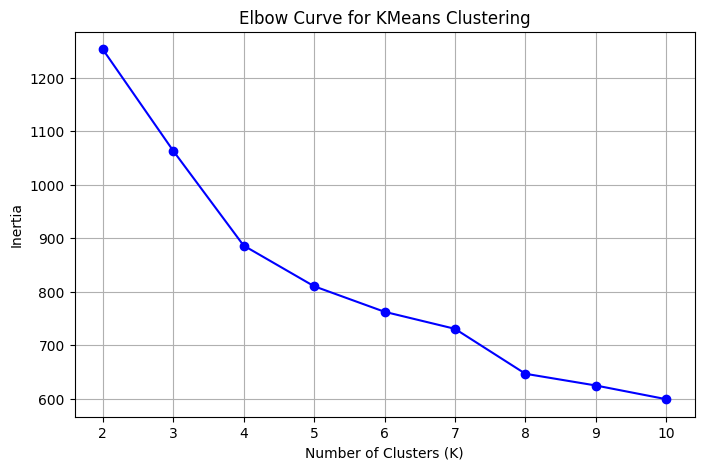

In [ ]:
# Elbow Curve (Inertia)
plt.figure(figsize=(12, 5))

K_Value = range(2, 11)
inertia = [1253.57, 1063.82, 886.54, 810.49, 762.71, 730.83, 646.81, 624.90, 599.25]

plt.figure(figsize=(8, 5))
plt.plot(K_Value, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_Value)
plt.grid(True)
plt.show()

Look for the “elbow” or "bend" in the curve — that’s where inertia starts to level off.

Based on your data, the elbow is likely around K = 3 or 4, as the drop in inertia becomes less steep after that

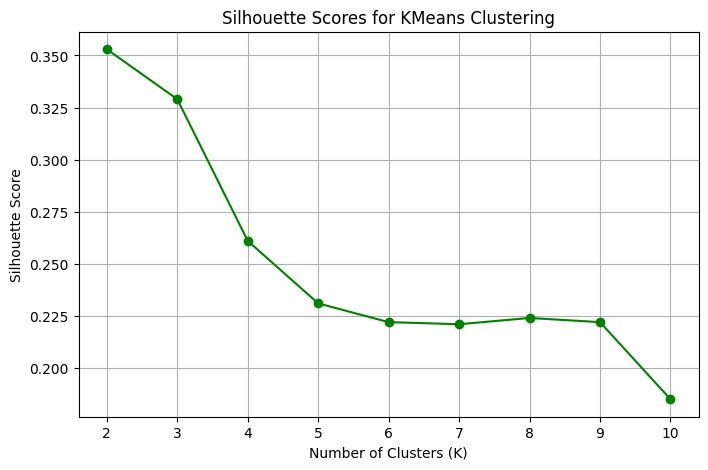

In [ ]:
silhouette_scores = [0.353, 0.329, 0.261, 0.231, 0.222, 0.221, 0.224, 0.222, 0.185]

plt.figure(figsize=(8, 5))
plt.plot(K_Value, silhouette_scores, marker='o',color='green')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_Value)
plt.grid(True)
plt.show()

The silhouette score tells you how well each data point fits within its assigned cluster, compared to other clusters.

+1: Point is well-clustered (far from other clusters).

0: Point is on the boundary between two clusters.

-1: Point may be in the wrong cluster.

K Silhouette Score Interpretation 2 0.353 Best overall separation – clusters are fairly distinct. 3 0.329 Still okay, but less separated. More overlap. 4 0.261 Quality of clustering drops — clusters start overlapping. 5–10 < 0.23 Weak clustering — clusters are poorly separated or too small.

K=2 is best for clean separation — maybe two types of customer behaviors (e.g. Horeca vs Retail, or high vs low spenders).

As K increases:

The algorithm tries to make more, smaller groups, but they overlap, reducing quality.

Silhouette scores drop — a sign of less meaningful clustering.

## Use both metrics to choose the optimal number of clusters.
Based on both inertia and silhouette score, the optimal number of clusters appears to be K = 2.

 Inertia:
Inertia decreases as the number of clusters increases, which is expected in KMeans.

However, the rate of decrease slows significantly after K = 3, forming an "elbow" in the curve.

This suggests that increasing clusters beyond 3 yields diminishing returns in terms of compactness.

 Silhouette Score:
The highest silhouette score is at K = 2 (score = 0.353), which indicates that the clusters are well-separated and internally coherent.

As K increases, the silhouette score drops, meaning that the clusters become less distinct and more overlapping.

For K ≥ 4, the silhouette score is consistently below 0.26, suggesting poor clustering quality.

 Conclusion:
Although inertia continues to drop beyond K=2, the best trade-off between cluster compactness (inertia) and cluster quality (silhouette) occurs at K = 2.
Therefore, K = 2 is the optimal number of clusters for this dataset.


#### Using K(2,4) to compare PCA to see comparison


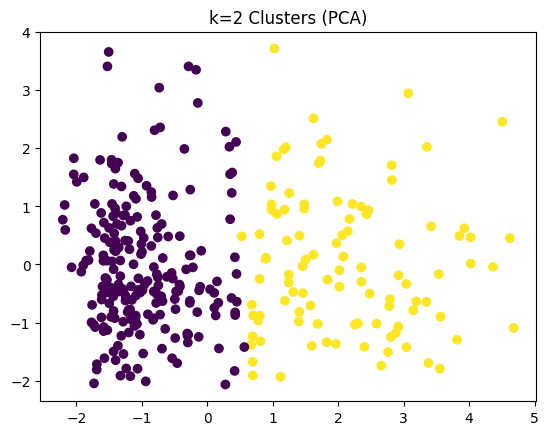

In [ ]:
from sklearn.decomposition import PCA


# For k=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)

plt.title("k=2 Clusters (PCA)")
plt.show()

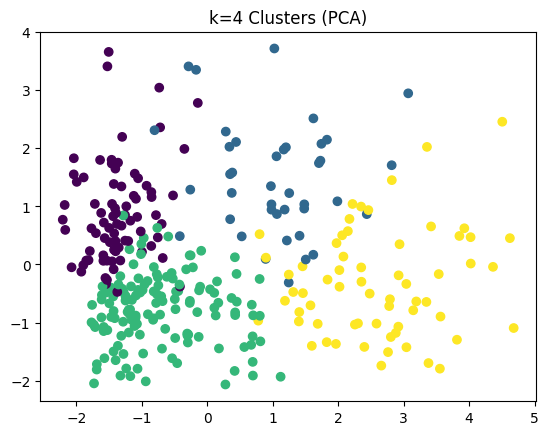

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# For k=4
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
pca = PCA(n_components=4).fit_transform(X_scaled)
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
plt.title("k=4 Clusters (PCA)")
plt.show()

In [ ]:
import numpy as np

best_k = K_Value[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters: K = {best_k}")


The optimal number of clusters: K = 2


# Part 3: Apply KMeans with Optimal K

In [ ]:
from sklearn.cluster import KMeans

# Choose optimal K as 2
optimal_k = 2

# Fit KMeans on scaled data
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled)


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Get cluster labels
cluster_labels = kmeans_final.labels_

# Add cluster labels to original data
X['Cluster'] = cluster_labels
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
3,13265,1196,4221,6404,507,1788,0
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,0
...,...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395,0
433,1982,3218,1493,1541,356,1449,0
434,16731,3922,7994,688,2371,838,0
438,10290,1981,2232,1038,168,2125,0


# Part 4: Cluster Profiling

In [ ]:
# List of product category columns
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Group by cluster and calculate mean spending per cluster
cluster_profile = X.groupby('Cluster')[spending_cols].mean().round(2)

cluster_profile

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,10310.35,2273.41,2980.28,2049.69,631.29,835.04
1,8445.86,7675.52,11114.17,1262.46,4438.84,1304.64


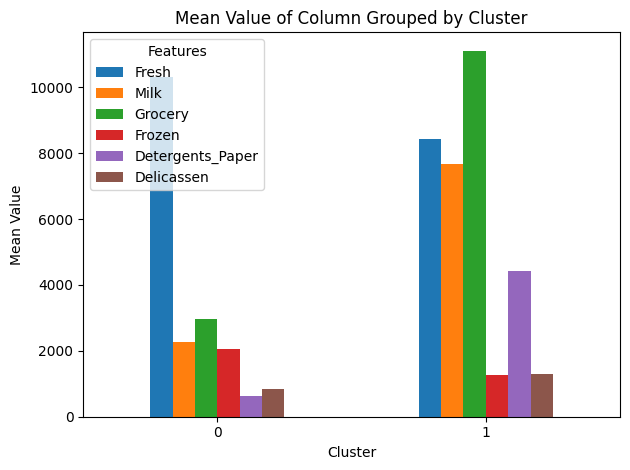

In [ ]:
# visualize the cluster mean using the the column plot
#plt.figure(figsize=(12, 8))

cluster_profile.plot(kind='bar')
plt.title('Mean Value of Column Grouped by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.tight_layout()
plt.savefig('Mean Value of Column Grouped by Cluster.png')
plt.show()

# Part 5: Business Application & Targeted Strategy
---
#*Cluster 0:*

**Spending Pattern:**

-High spending on Fresh products much more than Cluster 1.

-Moderate spending on Milk, Grocery, and Frozen (above 2,000).

-Very low spending on Detergents_Paper and Delicassen.

**Customer Profile:**

Likely represents Horeca businesses (hotels, restaurants, cafés) that rely on fresh ingredients for daily operations. The low interest in detergents and delicatessen supports this assumption.

**Business Strategy:**

Market Fresh and Frozen bundles with emphasis on freshness, seasonal deals, or direct-from-supplier offers.

Offer points or discounts for repeat purchases of fresh produce to build loyalty.

#*Cluster 1:*

**Spending Pattern:**

-Highest spending on Grocery (~14,000).

-Moderate spending on Milk, Fresh, and Detergents_Paper.

-Very low spending on Frozen and Delicassen.

**Customer Profile:**

-Likely composed of retailers or supermarkets that prioritize non-perishable, stockable goods like groceries and cleaning items.

**Suggested Strategy:**

Focus on promoting Grocery, Milk, and Detergents. Offer bulk discounts, stock replenishment programs, or loyalty rewards to encourage repeat purchases.

Send personalized offers for household items and gourmet products, which are their key interest areas.


 # Add a new column "Suggested Strategy"

In [ ]:
#Add a new column "Suggested Strategy" to the DataFrame

def marketing(cluster):
    if cluster == 0:
        return 'Loyalty rewards and freshness-focused offers'
    else:
        return 'Upsell grocery & household items'


X['Suggested Strategy'] = X['Cluster'].apply(marketing)
X.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Suggested Strategy
0,12669,9656,7561,214,2674,1338,1,Upsell grocery & household items
1,7057,9810,9568,1762,3293,1776,1,Upsell grocery & household items
3,13265,1196,4221,6404,507,1788,0,Loyalty rewards and freshness-focused offers
5,9413,8259,5126,666,1795,1451,1,Upsell grocery & household items
6,12126,3199,6975,480,3140,545,0,Loyalty rewards and freshness-focused offers
7,7579,4956,9426,1669,3321,2566,1,Upsell grocery & household items
8,5963,3648,6192,425,1716,750,0,Loyalty rewards and freshness-focused offers
9,6006,11093,18881,1159,7425,2098,1,Upsell grocery & household items
10,3366,5403,12974,4400,5977,1744,1,Upsell grocery & household items
11,13146,1124,4523,1420,549,497,0,Loyalty rewards and freshness-focused offers
